# Sentiment and Classification

For sentiment, we will look at VADER and NLTK's Sentiwordnet.

* "VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media."
  * https://github.com/cjhutto/vaderSentiment
  * nice example: https://rstudio-pubs-static.s3.amazonaws.com/79360_850b2a69980c4488b1db95987a24867a.html
  
* Sentiwordnet is a part of the NLTK library that includes sentiment scores for words on top of the information provided by wordnet.
  * https://www.nltk.org/howto/sentiwordnet.html

## VADER

In [1]:
import nltk
from nltk.sentiment import vader
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     c:\Users\chief\.conda\envs\geoprj\lib\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     c:\Users\chief\.conda\envs\geoprj\lib\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
sia = vader.SentimentIntensityAnalyzer()

In [3]:
sia.polarity_scores('Luke, I am your father.')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [4]:
sia.polarity_scores('NO!!!!!!')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [5]:
sia.polarity_scores('I hate you.')

{'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}

In [6]:
sia.polarity_scores('I HATE you.')

{'neg': 0.816, 'neu': 0.184, 'pos': 0.0, 'compound': -0.6633}

In [7]:
sia.polarity_scores('I HATE you!!!!')

{'neg': 0.849, 'neu': 0.151, 'pos': 0.0, 'compound': -0.765}

In [8]:
sia.polarity_scores('Thank you Dad')

{'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'compound': 0.3612}

Try typing in a couple sentences to explore polarity scores

sia.polarity_scores(':D')

In [9]:
sia.polarity_scores(':D')

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5106}

In [10]:
sia.polarity_scores(':(')

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4404}

In [11]:
sia.polarity_scores('>:(')

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5719}

Negation

In [12]:
sia.polarity_scores("I don't hate you")

{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.4585}

In [13]:
sia.polarity_scores("I don't not love you")

{'neg': 0.0, 'neu': 0.522, 'pos': 0.478, 'compound': 0.4122}

In [14]:
sia.polarity_scores("I love you")

{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}

In [15]:
sia.polarity_scores("I LOVE you")

{'neg': 0.0, 'neu': 0.169, 'pos': 0.831, 'compound': 0.7125}

In [16]:
sia.polarity_scores("I really love you")

{'neg': 0.0, 'neu': 0.308, 'pos': 0.692, 'compound': 0.6697}

In [17]:
sia.polarity_scores("I am in love with you")

{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}

In [18]:
sia.polarity_scores("I am so in love with you")

{'neg': 0.0, 'neu': 0.528, 'pos': 0.472, 'compound': 0.6682}

Contrast

In [19]:
sia.polarity_scores("I usually hate shrimp but I loved this")

{'neg': 0.201, 'neu': 0.342, 'pos': 0.457, 'compound': 0.6124}

The part after the but takes precendence

In [20]:
sia.polarity_scores("I usually hate shrimp and I loved this")

{'neg': 0.319, 'neu': 0.345, 'pos': 0.336, 'compound': 0.0516}

In [21]:
sia.polarity_scores("I usually hate shrimp and I liked this")

{'neg': 0.352, 'neu': 0.381, 'pos': 0.267, 'compound': -0.2263}

## Cornell's movie data reviews

https://www.cs.cornell.edu/people/pabo/movie-review-data/

In [22]:
# Open the data files
# read the lines of the files
# and for every line, convert it into an ASCII string

with open('rt-polaritydata/rt-polarity.neg','rb') as f:
    negReviews = f.readlines()
    for i in range(len(negReviews)):
        negReviews[i] = str(negReviews[i], 'ascii', errors='ignore')
        
with open('rt-polaritydata/rt-polarity.pos','rb') as f:
    posReviews = f.readlines()
    for i in range(len(posReviews)):
        posReviews[i] = str(posReviews[i], 'ascii', errors='ignore')

We'll work with the data in Pandas.

1. put the data into dataframes
2. add a column for polarity scores
3. concatenate the positive and negative reviews together into one collective dataframe

In [23]:
import pandas as pd

In [24]:
dfpos = pd.DataFrame({'Review':posReviews, 'Polarity':1})
dfneg = pd.DataFrame({'Review':negReviews, 'Polarity':-1})

In [25]:
dfpos.head()

,Review,Polarity
0,the rock is destined to be the 21st century's ...,1
1,"the gorgeously elaborate continuation of "" the...",1
2,effective but too-tepid biopic\r\n,1
3,if you sometimes like to go to the movies to h...,1
4,"emerges as something rare , an issue movie tha...",1


In [26]:
dfall = pd.concat([dfpos,dfneg], ignore_index=True)

Let's look at a couple example entries.

In [27]:
dfall.head()

,Review,Polarity
0,the rock is destined to be the 21st century's ...,1
1,"the gorgeously elaborate continuation of "" the...",1
2,effective but too-tepid biopic\r\n,1
3,if you sometimes like to go to the movies to h...,1
4,"emerges as something rare , an issue movie tha...",1


In [28]:
dfall.tail()

,Review,Polarity
10657,a terrible movie that some people will neverth...,-1
10658,there are many definitions of 'time waster' bu...,-1
10659,"as it stands , crocodile hunter has the hurrie...",-1
10660,the thing looks like a made-for-home-video qui...,-1
10661,"enigma is well-made , but it's just too dry an...",-1


Remember that `loc` is for indexing based on row and column labels, and that you can use Boolean indexing (i.e. you can use a true/false condition to retrieve specific rows or columns).

In [29]:
dfall.loc[dfall['Polarity']==1,'Review']

0       the rock is destined to be the 21st century's ...
1       the gorgeously elaborate continuation of " the...
2                      effective but too-tepid biopic\r\n
3       if you sometimes like to go to the movies to h...
4       emerges as something rare , an issue movie tha...
                              ...                        
5326    both exuberantly romantic and serenely melanch...
5327    mazel tov to a film about a family's joyous li...
5328    standing in the shadows of motown is the best ...
5329    it's nice to see piscopo again after all these...
5330    provides a porthole into that noble , tremblin...
Name: Review, Length: 5331, dtype: object

In [30]:
dfall.loc[dfall['Polarity']==-1,'Review'][:5]

5331                simplistic , silly and tedious . \r\n
5332    it's so laddish and juvenile , only teenage bo...
5333    exploitative and largely devoid of the depth o...
5334    [garbus] discards the potential for pathologic...
5335    a visually flashy but narratively opaque and e...
Name: Review, dtype: object

The following defines a function to return the Sentiment Intensity Analyzer's compound score for any review.

In [31]:
def getSentiment(review):
    return sia.polarity_scores(review)['compound']

In [32]:
# Test
myreview = 'This movie tries to be Star Wars but fails miserably.'

In [33]:
getSentiment(myreview)

-0.8793

We're going to make a new list of the review scores from Vader.

We'll use list comprehension to streamline this process.

In [34]:
# Example list comprehension
[i for i in [1,2,3,4]]

[1, 2, 3, 4]

In [35]:
[a for a in range(5)]

[0, 1, 2, 3, 4]

In [36]:
[x for x in [2,3,6,5,7,8,4] if x > 5]

[6, 7, 8]

The following makes a list of Vader's review scores for every row of the dataframe `dfall` and adds the scores into a new column `VaderSentiment`

In [37]:
dfall['VaderSentiment'] = [getSentiment(review) for review in dfall['Review']]

In [38]:
dfall.head()

,Review,Polarity,VaderSentiment
0,the rock is destined to be the 21st century's ...,1,0.3612
1,"the gorgeously elaborate continuation of "" the...",1,0.8069
2,effective but too-tepid biopic\r\n,1,0.2617
3,if you sometimes like to go to the movies to h...,1,0.8271
4,"emerges as something rare , an issue movie tha...",1,0.6592


Count the number of rows where Polarity = 1 and Vader Sentiment is > 0 (that is, where Vader would classify the sentiment as being positive).

In [39]:
dfall.loc[(dfall['Polarity']==1) & (dfall['VaderSentiment']>0),'Review'].count()

3704

We can quantify the percentage correctly classified by Vader as positive.

In [40]:
correct = dfall.loc[(dfall['Polarity']==1) & (dfall['VaderSentiment']>0),'Review'].count()
total = dfall.loc[(dfall['Polarity']==1),'Review'].count()
correct/total

0.6948039767398236

And the percentage correctly classified as negative.

In [41]:
correct = dfall.loc[(dfall['Polarity']==-1) & (dfall['VaderSentiment']<0),'Review'].count()
total = dfall.loc[(dfall['Polarity']==-1),'Review'].count()
correct/total

0.40142562371037327

Less than 50% correct for the negative sentiments!!  Worse than random chance.

Let's check out a couple examples.

In [42]:
for i in dfall.loc[(dfall['Polarity']==-1)][:5].index:
    print(dfall.loc[i,'VaderSentiment'], ':', dfall.loc[i,'Review'])

0.0258 : simplistic , silly and tedious . 

0.4404 : it's so laddish and juvenile , only teenage boys could possibly find it funny . 

0.0 : exploitative and largely devoid of the depth or sophistication that would make watching such a graphic treatment of the crimes bearable . 

-0.25 : [garbus] discards the potential for pathological study , exhuming instead , the skewed melodrama of the circumstantial situation . 

0.0 : a visually flashy but narratively opaque and emotionally vapid exercise in style and mystification . 



In [43]:
getSentiment('''exploitative and largely devoid of the depth or 
             sophistication that would make watching such a graphic 
             treatment of the crimes bearable''')

0.0

Let's look at the distribution of scores to see if that provides any insights.

<AxesSubplot:>

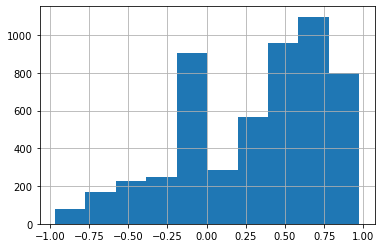

In [44]:
dfall.loc[dfall['Polarity']==1, 'VaderSentiment'].hist()

<AxesSubplot:>

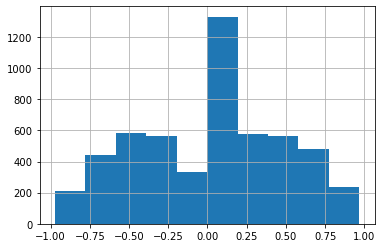

In [45]:
dfall.loc[dfall['Polarity']==-1, 'VaderSentiment'].hist()

The total accuracy is given by:

In [46]:
poscorrect = dfall.loc[(dfall['Polarity']==1) & (dfall['VaderSentiment']>0),'Review'].count()
negcorrect = dfall.loc[(dfall['Polarity']==-1) & (dfall['VaderSentiment']<0),'Review'].count()
total = dfall['Review'].count()
(poscorrect + negcorrect)/total

0.5481148002250985

We can encapsulate the essential code from above into a function to generalize the process.

In [47]:
def runScoring(dfall):
    poscorrect = dfall.loc[(dfall['Polarity']==1) & (dfall['VaderSentiment']>0),'Review'].count()
    postotal = dfall.loc[(dfall['Polarity']==1),'Review'].count()

    negcorrect = dfall.loc[(dfall['Polarity']==-1) & (dfall['VaderSentiment']<0),'Review'].count()
    negtotal = dfall.loc[(dfall['Polarity']==-1),'Review'].count()

    total = dfall['Review'].count()

    print('The accuracy for positive reviews is: ' + str(poscorrect/postotal*100) + '%')
    print('The accuracy for negative reviews is: ' + str(negcorrect/negtotal*100) + '%')
    print('The overall accuracy is: ' + str((poscorrect+negcorrect)/total*100) + '%')

In [48]:
runScoring(dfall)

The accuracy for positive reviews is: 69.48039767398237%
The accuracy for negative reviews is: 40.14256237103733%
The overall accuracy is: 54.81148002250985%


# Sentiwordnet

NLTK includes functionality for using Sentiwordnet, a lexical tool that includes information about words' synsets (words that are like synonyms) and thereby can be used to help assess sentiment.

In [49]:
from nltk.corpus import sentiwordnet as swn
nltk.download('sentiwordnet')

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     c:\Users\chief\.conda\envs\geoprj\lib\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


True

In [50]:
list(swn.senti_synsets('funny'))

[SentiSynset('funny_story.n.01'),
 SentiSynset('amusing.s.02'),
 SentiSynset('curious.s.01'),
 SentiSynset('fishy.s.02'),
 SentiSynset('funny.s.04')]

In [51]:
list(swn.senti_synsets('funny'))[0]

SentiSynset('funny_story.n.01')

In [52]:
list(swn.senti_synsets('funny'))[0].pos_score()

0.0

In [53]:
list(swn.senti_synsets('funny'))[0].neg_score()

0.0

In [54]:
list(swn.senti_synsets('funny'))[0].obj_score()

1.0

In [55]:
for i in list(swn.senti_synsets('funny')):
    print(i)

<funny_story.n.01: PosScore=0.0 NegScore=0.0>
<amusing.s.02: PosScore=0.5 NegScore=0.0>
<curious.s.01: PosScore=0.125 NegScore=0.375>
<fishy.s.02: PosScore=0.0 NegScore=0.5>
<funny.s.04: PosScore=0.0 NegScore=0.5>


`wordnet` allows us to get definitions of the synsets

In [56]:
from nltk.corpus import wordnet

In [57]:
for i in wordnet.synsets('funny'):
    print(i,i.definition())

Synset('funny_story.n.01') an account of an amusing incident (usually with a punch line)
Synset('amusing.s.02') arousing or provoking laughter
Synset('curious.s.01') beyond or deviating from the usual or expected
Synset('fishy.s.02') not as expected
Synset('funny.s.04') experiencing odd bodily sensations


Consider one review:

In [58]:
dfall.loc[0,'Review']

'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal . \r\n'

We could use the synset polarity scores of individual words in a sentence to manually score a review's sentiment.
1. break up a sentence into words
2. remove stopwords
3. sum the synset scores of the words
  * for each word, a simple first attempt is to take all the synsets and (a) add the positive score if the positive score is largest or (b) subtract the negative score if the negative score is largest, and then divide the total sum of all synset scores by the number of synsets.

In [59]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation
myStopWords = list(punctuation) + stopwords.words('english')

Example of breaking a review into a list of individual words:

In [60]:
[w for w in word_tokenize(dfall.loc[0,'Review'].lower())]

['the',
 'rock',
 'is',
 'destined',
 'to',
 'be',
 'the',
 '21st',
 'century',
 "'s",
 'new',
 '``',
 'conan',
 '``',
 'and',
 'that',
 'he',
 "'s",
 'going',
 'to',
 'make',
 'a',
 'splash',
 'even',
 'greater',
 'than',
 'arnold',
 'schwarzenegger',
 ',',
 'jean-claud',
 'van',
 'damme',
 'or',
 'steven',
 'segal',
 '.']

The same list, but with stopwords removed:

In [61]:
[w for w in word_tokenize(dfall.loc[0,'Review'].lower()) if w not in myStopWords]

['rock',
 'destined',
 '21st',
 'century',
 "'s",
 'new',
 '``',
 'conan',
 '``',
 "'s",
 'going',
 'make',
 'splash',
 'even',
 'greater',
 'arnold',
 'schwarzenegger',
 'jean-claud',
 'van',
 'damme',
 'steven',
 'segal']

Here's our function for getting the average synset scores of words in a review and summing them all up to get a polarity score for the review.

In [62]:
def naiveSentiment(review):
    reviewPolarity = 0.0
    words = [w for w in word_tokenize(review.lower()) if w not in myStopWords]
    for word in words:
        sentScore = 0.0
        if len(list(swn.senti_synsets(word))) > 0:
            for i in list(swn.senti_synsets(word)):
                if i.pos_score() > i.neg_score():
                    sentScore += i.pos_score()
                else:
                    sentScore -= i.neg_score()
            reviewPolarity += sentScore / len(list(swn.senti_synsets(word)))
    
    return reviewPolarity

In [63]:
naiveSentiment(dfall.loc[0,'Review'])

0.5020851289233642

Make a new column in our main dataframe that uses our sentiwordnet-based scoring system.

In [64]:
dfall['naiveSentiment'] = [naiveSentiment(review) for review in dfall['Review']]

Copy the above `runScoring` for a final method assessment, but now add an extra variable for specifying the particular sentiment column to use.

In [65]:
def runScoring(dfall,sentimentMethod):
    poscorrect = dfall.loc[(dfall['Polarity']==1) & (dfall[sentimentMethod]>0),'Review'].count()
    postotal = dfall.loc[(dfall['Polarity']==1),'Review'].count()

    negcorrect = dfall.loc[(dfall['Polarity']==-1) & (dfall[sentimentMethod]<0),'Review'].count()
    negtotal = dfall.loc[(dfall['Polarity']==-1),'Review'].count()

    total = dfall['Review'].count()

    print('The accuracy for positive reviews is: ' + str(poscorrect/postotal*100) + '%')
    print('The accuracy for negative reviews is: ' + str(negcorrect/negtotal*100) + '%')
    print('The overall accuracy is: ' + str((poscorrect+negcorrect)/total*100) + '%')

In [66]:
runScoring(dfall, 'VaderSentiment')

The accuracy for positive reviews is: 69.48039767398237%
The accuracy for negative reviews is: 40.14256237103733%
The overall accuracy is: 54.81148002250985%


In [67]:
runScoring(dfall, 'naiveSentiment')

The accuracy for positive reviews is: 69.91183642843744%
The accuracy for negative reviews is: 50.87225661226786%
The overall accuracy is: 60.39204652035265%


This method with synset scoring does a slightly better job at classification, though admittedly its method of approach is relatively simplistic.

Let's again look at the distribution of scores for the reviews that have a real positive or negative polarity.

<AxesSubplot:>

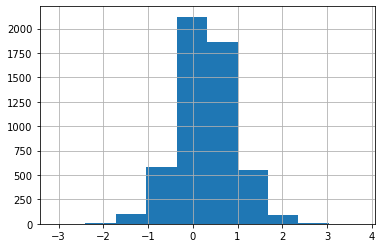

In [68]:
dfall.loc[dfall['Polarity']==1, 'naiveSentiment'].hist()

<AxesSubplot:>

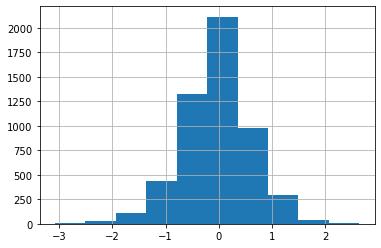

In [69]:
dfall.loc[dfall['Polarity']==-1, 'naiveSentiment'].hist()

There are many shortcomings.  But actually, one shortcoming is very easy to spot:  Vader properly accounts for negation while our naive sentiment scorer with synset averaging does not. 

In [70]:
getSentiment('this restaurant is lousy')

-0.5423

In [71]:
getSentiment('this restaurant is not lousy')

0.431

In [72]:
naiveSentiment('this restaurant is lousy')

-0.7083333333333334

In [73]:
naiveSentiment('this restaurant is not lousy')

-0.7083333333333334

Why is this?

In [74]:
print(myStopWords)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when'

Note that "not" is in the stopwords -> it's been completely dropped before our naiveSentiment scorer ran.

## Naive Bayes

In [75]:
dfall

,Review,Polarity,VaderSentiment,naiveSentiment
0,the rock is destined to be the 21st century's ...,1,0.3612,0.502085
1,"the gorgeously elaborate continuation of "" the...",1,0.8069,0.686632
2,effective but too-tepid biopic\r\n,1,0.2617,0.270833
3,if you sometimes like to go to the movies to h...,1,0.8271,0.767344
4,"emerges as something rare , an issue movie tha...",1,0.6592,0.908742
...,...,...,...,...
10657,a terrible movie that some people will neverth...,-1,-0.4767,-1.055373
10658,there are many definitions of 'time waster' bu...,-1,0.5927,0.302083
10659,"as it stands , crocodile hunter has the hurrie...",-1,-0.7783,-0.961231
10660,the thing looks like a made-for-home-video qui...,-1,0.3612,0.218209


We can manually split our dataframe into training and test sets (and make sure that we keep a 50/50 split in each of positive/negative reviews).

In [76]:
trainNum = 2000
testNum = 5331 - trainNum

trainPosReviews = dfall.loc[dfall['Polarity']==1][:trainNum]
testPosReviews = dfall.loc[dfall['Polarity']==1][trainNum:]

trainNegReviews = dfall.loc[dfall['Polarity']==-1][:trainNum]
testNegReviews = dfall.loc[dfall['Polarity']==-1][trainNum:]

In [77]:
trainPosReviews

,Review,Polarity,VaderSentiment,naiveSentiment
0,the rock is destined to be the 21st century's ...,1,0.3612,0.502085
1,"the gorgeously elaborate continuation of "" the...",1,0.8069,0.686632
2,effective but too-tepid biopic\r\n,1,0.2617,0.270833
3,if you sometimes like to go to the movies to h...,1,0.8271,0.767344
4,"emerges as something rare , an issue movie tha...",1,0.6592,0.908742
...,...,...,...,...
1995,though it's not very well shot or composed or ...,1,-0.4991,0.244926
1996,the entire cast is extraordinarily good . \r\n,1,0.4404,0.275694
1997,"yakusho , as always , is wonderful as the long...",1,0.1531,1.177564
1998,the film delivers what it promises : a look at...,1,0.3818,-0.105795


We're going to use word frequencies to get our probabilities for Bayesian estimation.

The following makes lists of words found in the positive reviews and in the negative reviews (and drops stopwords).  It also makes a list of all words called `vocab`.

In [78]:
posWords = []
negWords = []
vocab = []
for i in trainPosReviews.index:
    words = [w for w in word_tokenize(trainPosReviews.loc[i,'Review'].lower()) if w not in myStopWords]
    for word in words:
        if word not in posWords:
            posWords.append(word)
        if word not in vocab:
            vocab.append(word)
for i in trainNegReviews.index:
    words = [w for w in word_tokenize(trainNegReviews.loc[i,'Review'].lower()) if w not in myStopWords]
    for word in words:
        if word not in negWords:
            negWords.append(word)
        if word not in vocab:
            vocab.append(word)
    

In [79]:
# Here is the list of all words retained:
vocab

['rock',
 'destined',
 '21st',
 'century',
 "'s",
 'new',
 '``',
 'conan',
 'going',
 'make',
 'splash',
 'even',
 'greater',
 'arnold',
 'schwarzenegger',
 'jean-claud',
 'van',
 'damme',
 'steven',
 'segal',
 'gorgeously',
 'elaborate',
 'continuation',
 'lord',
 'rings',
 'trilogy',
 'huge',
 'column',
 'words',
 'adequately',
 'describe',
 'co-writer/director',
 'peter',
 'jackson',
 'expanded',
 'vision',
 'j',
 'r',
 'tolkien',
 'middle-earth',
 'effective',
 'too-tepid',
 'biopic',
 'sometimes',
 'like',
 'go',
 'movies',
 'fun',
 'wasabi',
 'good',
 'place',
 'start',
 'emerges',
 'something',
 'rare',
 'issue',
 'movie',
 'honest',
 'keenly',
 'observed',
 "n't",
 'feel',
 'one',
 'film',
 'provides',
 'great',
 'insight',
 'neurotic',
 'mindset',
 'comics',
 '--',
 'reached',
 'absolute',
 'top',
 'game',
 'offers',
 'combination',
 'entertainment',
 'education',
 'perhaps',
 'picture',
 'ever',
 'made',
 'literally',
 'showed',
 'road',
 'hell',
 'paved',
 'intentions',
 'st

Each review is made into a "feature vector".  This vector is a long dictionary -- every word in the total `vocab` list is a key and for each key, the value is set to `1` if the word is in the review and to `0` if the word is not in the review.

In [80]:
def makeFeatureVector(review):
    words = [w for w in word_tokenize(review.lower()) if w not in myStopWords]
    featureVector = {}
    for word in vocab:
        if word in words:
            featureVector[word] = 1
        else:
            featureVector[word] = 0
    return featureVector

Here's an example of the feature vector for a review that reads "This is my favorite movie"

In [81]:
makeFeatureVector('This is my favorite movie')

{'rock': 0,
 'destined': 0,
 '21st': 0,
 'century': 0,
 "'s": 0,
 'new': 0,
 '``': 0,
 'conan': 0,
 'going': 0,
 'make': 0,
 'splash': 0,
 'even': 0,
 'greater': 0,
 'arnold': 0,
 'schwarzenegger': 0,
 'jean-claud': 0,
 'van': 0,
 'damme': 0,
 'steven': 0,
 'segal': 0,
 'gorgeously': 0,
 'elaborate': 0,
 'continuation': 0,
 'lord': 0,
 'rings': 0,
 'trilogy': 0,
 'huge': 0,
 'column': 0,
 'words': 0,
 'adequately': 0,
 'describe': 0,
 'co-writer/director': 0,
 'peter': 0,
 'jackson': 0,
 'expanded': 0,
 'vision': 0,
 'j': 0,
 'r': 0,
 'tolkien': 0,
 'middle-earth': 0,
 'effective': 0,
 'too-tepid': 0,
 'biopic': 0,
 'sometimes': 0,
 'like': 0,
 'go': 0,
 'movies': 0,
 'fun': 0,
 'wasabi': 0,
 'good': 0,
 'place': 0,
 'start': 0,
 'emerges': 0,
 'something': 0,
 'rare': 0,
 'issue': 0,
 'movie': 1,
 'honest': 0,
 'keenly': 0,
 'observed': 0,
 "n't": 0,
 'feel': 0,
 'one': 0,
 'film': 0,
 'provides': 0,
 'great': 0,
 'insight': 0,
 'neurotic': 0,
 'mindset': 0,
 'comics': 0,
 '--': 0,
 '

Make our training data by making a list that contains the review strings and their respective Polarity scores.

In [82]:
trainingData = []
for i in trainPosReviews.index:
    trainingData.append((trainPosReviews.loc[i,'Review'],trainPosReviews.loc[i,'Polarity']))
for i in trainNegReviews.index:
    trainingData.append((trainNegReviews.loc[i,'Review'],trainNegReviews.loc[i,'Polarity']))

Here are the first five items of our training data:

In [83]:
trainingData[:5]

[('the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal . \r\n',
  1),
 ('the gorgeously elaborate continuation of " the lord of the rings " trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson\'s expanded vision of j . r . r . tolkien\'s middle-earth . \r\n',
  1),
 ('effective but too-tepid biopic\r\n', 1),
 ('if you sometimes like to go to the movies to have fun , wasabi is a good place to start . \r\n',
  1),
 ("emerges as something rare , an issue movie that's so honest and keenly observed that it doesn't feel like one . \r\n",
  1)]

And here's an example negative review contained in our training data:

In [84]:
trainingData[2500]

(' . . . a weak and ineffective ghost story without a conclusion or pay off . \r\n',
 -1)

As part of our steps to pre-process the data, we need to convert each review in our training data into a feature vector.

To do this, we can use `nltk.classify.apply_features`.  We pass in our training dataset, as well as the function that we have defined above to make a feature vector out of a review, `makeFeatureVector`.  `apply_features` applies the function to convert every review contained in the training dataset into a feature vector, and the result gets returned and then stored into our new variable `trainingFeatureVectors`.

In [85]:
trainingFeatureVectors = nltk.classify.apply_features(makeFeatureVector, trainingData)

Here's how the first review turned out:

In [86]:
trainingFeatureVectors[0]

({'rock': 1,
  'destined': 1,
  '21st': 1,
  'century': 1,
  "'s": 1,
  'new': 1,
  '``': 1,
  'conan': 1,
  'going': 1,
  'make': 1,
  'splash': 1,
  'even': 1,
  'greater': 1,
  'arnold': 1,
  'schwarzenegger': 1,
  'jean-claud': 1,
  'van': 1,
  'damme': 1,
  'steven': 1,
  'segal': 1,
  'gorgeously': 0,
  'elaborate': 0,
  'continuation': 0,
  'lord': 0,
  'rings': 0,
  'trilogy': 0,
  'huge': 0,
  'column': 0,
  'words': 0,
  'adequately': 0,
  'describe': 0,
  'co-writer/director': 0,
  'peter': 0,
  'jackson': 0,
  'expanded': 0,
  'vision': 0,
  'j': 0,
  'r': 0,
  'tolkien': 0,
  'middle-earth': 0,
  'effective': 0,
  'too-tepid': 0,
  'biopic': 0,
  'sometimes': 0,
  'like': 0,
  'go': 0,
  'movies': 0,
  'fun': 0,
  'wasabi': 0,
  'good': 0,
  'place': 0,
  'start': 0,
  'emerges': 0,
  'something': 0,
  'rare': 0,
  'issue': 0,
  'movie': 0,
  'honest': 0,
  'keenly': 0,
  'observed': 0,
  "n't": 0,
  'feel': 0,
  'one': 0,
  'film': 0,
  'provides': 0,
  'great': 0,
  'ins

NLTK has a module `NaiveBayesClassifier`.  Rather than using `fit` as we are used to from scikit-learn, here we use the `train` method.  Furthermore, the data passed into the `train` method has both the independent variable (the review's feature vector) and the dependent variable (the polarity score).

In [87]:
trainedClassifier = nltk.NaiveBayesClassifier.train(trainingFeatureVectors)

Now that we have trained our classifier, we can use it to predict the sentiment score of any review.

To make a prediction, we need to convert the review into a feature vector and then pass that feature vector into our trained classifier to get the prediction.

The following functions carries out those two steps:

In [88]:
def naiveBayesSentimentCalculator(review):
    problemFeatureVector = makeFeatureVector(review)
    return trainedClassifier.classify(problemFeatureVector)

Here are two test examples:

In [89]:
naiveBayesSentimentCalculator("What an awesome movie")

1

In [90]:
naiveBayesSentimentCalculator("What a terrible movie")

-1

As you can see, since our Polarity scores were 1 and -1, our classifier gives us 1 and -1 as possible classes.

To quantify how our classifier performs, we now pass in the test data to produce predicted sentiment scores that we can compare against the actual test data's Polarity.

In [91]:
testPosReviews['naiveBayesSentiment'] = [naiveBayesSentimentCalculator(review) for review in testPosReviews['Review']]
testNegReviews['naiveBayesSentiment'] = [naiveBayesSentimentCalculator(review) for review in testNegReviews['Review']]

The following function assesses the accuracy of our Naives Bayes classifier.

In [92]:
def runScoringNB():
    poscorrect = testPosReviews.loc[(testPosReviews['Polarity']==1) & (testPosReviews['naiveBayesSentiment']==1),'Review'].count()
    postotal = testPosReviews.loc[(testPosReviews['Polarity']==1),'Review'].count()

    negcorrect = testNegReviews.loc[(testNegReviews['Polarity']==-1) & (testNegReviews['naiveBayesSentiment']==-1),'Review'].count()
    negtotal = testNegReviews.loc[(testNegReviews['Polarity']==-1),'Review'].count()

    total = testPosReviews['Review'].count() + testNegReviews['Review'].count()

    print('The accuracy for positive reviews is: ' + str(poscorrect/postotal*100) + '%')
    print('The accuracy for negative reviews is: ' + str(negcorrect/negtotal*100) + '%')
    print('The overall accuracy is: ' + str((poscorrect+negcorrect)/total*100) + '%')

In [93]:
runScoring(dfall, 'VaderSentiment')
runScoring(dfall, 'naiveSentiment')
runScoringNB()

The accuracy for positive reviews is: 69.48039767398237%
The accuracy for negative reviews is: 40.14256237103733%
The overall accuracy is: 54.81148002250985%
The accuracy for positive reviews is: 69.91183642843744%
The accuracy for negative reviews is: 50.87225661226786%
The overall accuracy is: 60.39204652035265%
The accuracy for positive reviews is: 73.13119183428401%
The accuracy for negative reviews is: 74.99249474632242%
The overall accuracy is: 74.06184329030322%


The accuracy here is starting to improve!